<a href="https://colab.research.google.com/github/emmenets/neuralnetwork/blob/master/2019708meanshiftzugriffrasenvideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import imutils

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image
from IPython.display import clear_output
import urllib
import time


from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


(335, 494, 100, 111)


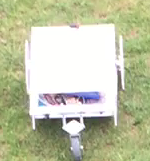

In [35]:
path = "/gdrive/My Drive/colabfiles/lektion31/"
video = cv2.VideoCapture(path+"rasen.mov")
inittime = time.time()
lower_white = np.array([0, 0, 200])
upper_white = np.array([179, 20, 255])
_, first_frame = video.read()

first_frame = imutils.rotate_bound(first_frame, 90)
first_frame_copy = first_frame.copy()

hsv = cv2.cvtColor(first_frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_white, upper_white)
res = cv2.bitwise_and(first_frame, first_frame, mask = mask)
_, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
  area = cv2.contourArea(contour)
  if area > 1000:
      
              
      rect = cv2.boundingRect(contour)
      print(rect)
      x,y,w,h = cv2.boundingRect(contour)
      cx = int(x+w/2)
      cy = int(y+h/4)
      cv2.circle(first_frame, (cx,cy), 4, (0,255,255), -1)
      #print(first_frame.shape)
      roi = first_frame_copy[y-25:y+h+25, x-25:x+w+25]
      cv2_imshow(roi)
      cv2.rectangle(first_frame,(x,y),(x+w,y+h),(0,255,0),2)
      rect = cv2.minAreaRect(contour)
      box = cv2.boxPoints(rect)
      #print(box)
      box = np.int0(box)
      #print(box)
      cv2.polylines(first_frame, [box], True, (255,0,0), 2)
      cv2.drawContours(first_frame,[box],0,(0,0,255),2)
      first_frame=imutils.resize(first_frame, 400)
#cv2_imshow(first_frame)

MeanShift

In [0]:
video = cv2.VideoCapture(path+"rasen.mov")
inittime = time.time()
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([hsv_roi], [0], None, [180], [0, 180])
roi_hist = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)
bildnr = 0



while True:
  acttime = time.time()
  timediff = acttime-inittime
  _, frame = video.read()
  frame = imutils.rotate_bound(frame, 90)
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  mask = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)
  
  _, track_window = cv2.meanShift(mask, (x, y ,w, h), term_criteria)
  x, y, w, h = track_window 
  cx = int(x+(w/2))
  cy = int(y+(h/2))
  #cv2.circle(frame, (cx,cy), 3, (255,0,0), -1)
  #cv2.rectangle(frame, (x,y),(x+w,y+h), (255,0,0), 5)
  rasti = frame[y:y+h, x:x+w]
  
  if timediff > 1:
    frame1 = imutils.resize(frame, 200)
    mask1 = imutils.resize(mask, 200)
    bildbeschreibung = path+"bild"+str(bildnr)+".jpg"
    print(bildbeschreibung)
    cv2.imwrite(bildbeschreibung, rasti)
    bildnr += 1
      
    #clear_output()
    #cv2_imshow(rasti)
    
    #cv2_imshow(frame1)
    inittime = time.time()


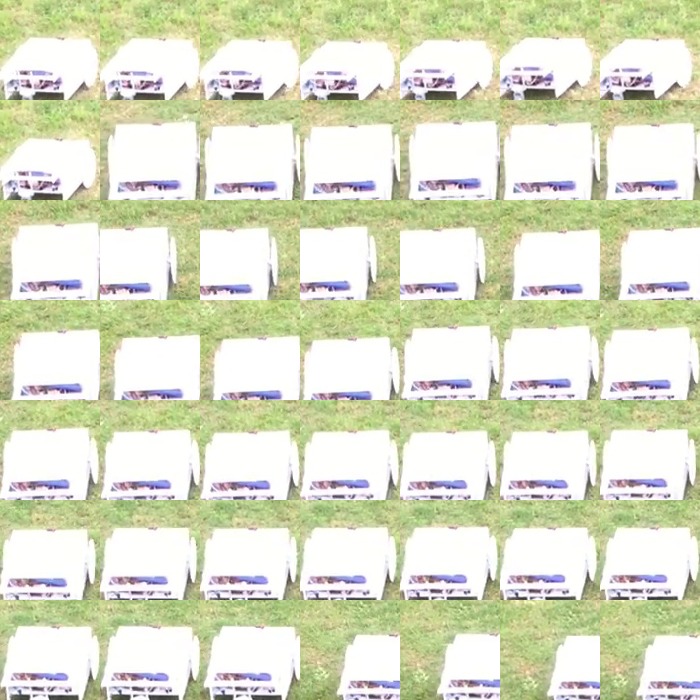

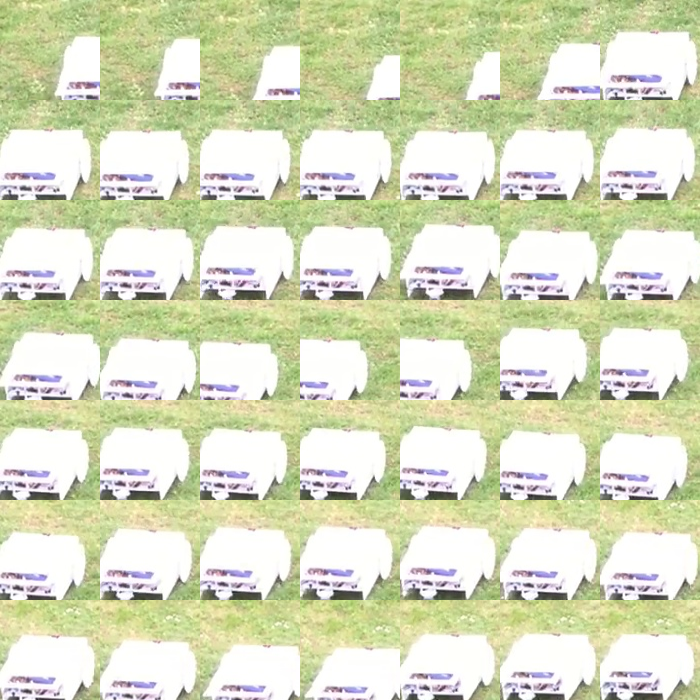

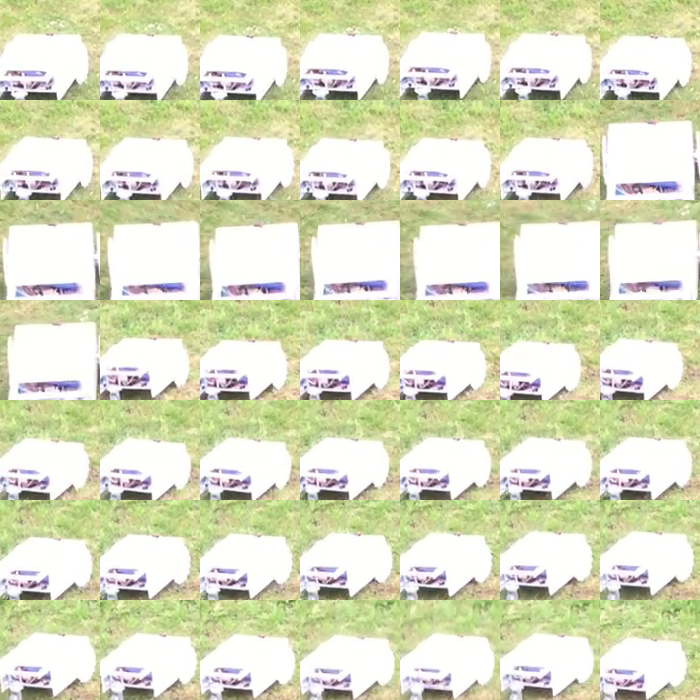

In [0]:
import glob
from imutils import build_montages
path = glob.glob("/gdrive/My Drive/colabfiles/lektion31/*.jpg")
cv_img = []
for img in path:
    rm img
    print(img)
    #n = cv2.imread(img)
    #cv_img.append(n)
    
#montages = build_montages(cv_img, (100,100), (7,7))
#for montage in montages:
  #cv2_imshow(montage)
  #print("----------")